##### 一个简单的例子

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad_(True)
x.grad

In [5]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [6]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [7]:
x.grad == 4 *x

tensor([True, True, True, True])

In [8]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

##### 非标量变量的反向传播

In [9]:
x.grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

##### 分离计算

In [22]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u * x


In [23]:
z.sum().backward()
x.grad==u


tensor([True, True, True, True])

In [28]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 *x

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [29]:
def f(a):
    b = a *2
    while b.norm() <1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c=100*b
    return c

In [30]:
a = torch.randn(size=(),requires_grad = True)
a
d=f(a)
d.backward()

In [37]:
a.grad

tensor(512.)

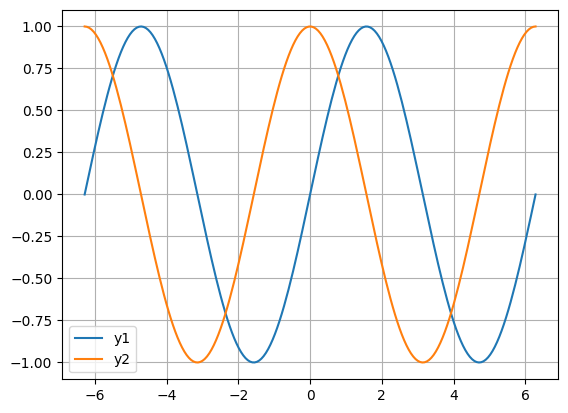

In [1]:
import math
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-2*torch.pi, 2*torch.pi, 200)
x1 = torch.linspace(-2*torch.pi, 2*torch.pi, 200)
y1 = torch.sin(x)
plt.plot(x1.detach().numpy(),y1.detach().numpy(),label = 'y1')
x.requires_grad_()
y2 = torch.sin(x)
y2.backward(torch.ones_like(y2))
y2 = x.grad
plt.plot(x1.detach().numpy(),y2.detach().numpy(),label='y2')
plt.legend()
plt.grid()
plt.show()

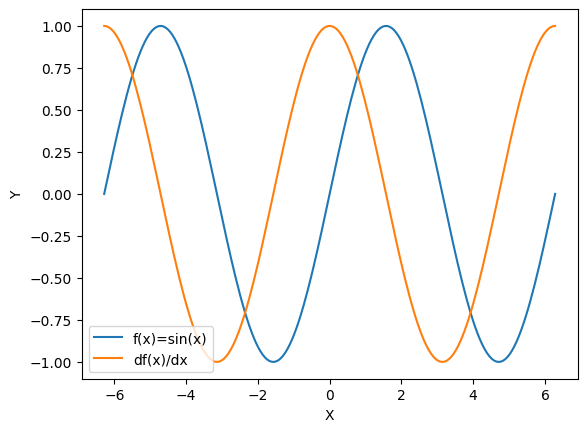

In [2]:
def f(x):
    return torch.sin(x)

def df(x):
    x.requires_grad_()
    y = f(x)
    y.backward(torch.ones_like(y))
    return x.grad

x = torch.linspace(-2*torch.pi, 2*torch.pi, 200)

y1 = f(x)
y2 = df(x)

plt.plot(x.detach().numpy(), y1.detach().numpy(), label='f(x)=sin(x)')
plt.plot(x.detach().numpy(), y2.detach().numpy(), label='df(x)/dx')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
